# Aula 5 
## Challenge 3
___

Correlacione todas as variáveis existentes na base de dados do challenge 1 e sugira quais atributos devem ser removidos e por qual motivo.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
df_pimas = pd.read_csv("data/pima-data-norm.csv", index_col=0)
df_pimas.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
id,,,,,,,,,,
0,6,148.0,72.000000,35.000000,0.0,33.6,0.627,50,1.379000,True
1,1,85.0,66.000000,29.000000,0.0,26.6,0.351,31,1.142600,False
2,8,183.0,69.112125,0.000000,0.0,23.3,0.672,32,0.809136,True
3,1,89.0,66.000000,20.528105,94.0,28.1,0.167,21,0.906200,False
4,0,137.0,40.000000,35.000000,168.0,43.1,2.288,33,1.379000,True


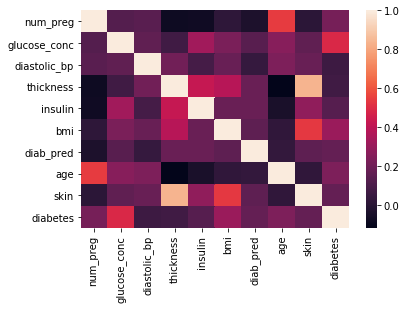

In [13]:
sns.heatmap(df_pimas.corr())

In [14]:
corr = df_pimas.corr()

In [15]:
corr

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.127964,0.141713,-0.077546,-0.072711,0.021546,-0.033523,0.544341,0.013376,0.221898
glucose_conc,0.127964,1.000000,0.158980,0.072947,0.330649,0.231478,0.137106,0.266600,0.160766,0.492908
diastolic_bp,0.141713,0.158980,1.000000,0.207848,0.085498,0.183802,0.041475,0.239502,0.180681,0.065541
thickness,-0.077546,0.072947,0.207848,1.000000,0.427653,0.384818,0.186830,-0.117321,0.841297,0.074657
insulin,-0.072711,0.330649,0.085498,0.427653,1.000000,0.185101,0.185162,-0.042272,0.285989,0.131823
bmi,0.021546,0.231478,0.183802,0.384818,0.185101,1.000000,0.153508,0.025748,0.535703,0.312254
diab_pred,-0.033523,0.137106,0.041475,0.186830,0.185162,0.153508,1.000000,0.033561,0.154961,0.173844
age,0.544341,0.266600,0.239502,-0.117321,-0.042272,0.025748,0.033561,1.000000,0.026423,0.238356
skin,0.013376,0.160766,0.180681,0.841297,0.285989,0.535703,0.154961,0.026423,1.000000,0.175026
diabetes,0.221898,0.492908,0.065541,0.074657,0.131823,0.312254,0.173844,0.238356,0.175026,1.000000


In [16]:
corr[corr > 0.8]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glucose_conc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diastolic_bp,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thickness,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.841297,NaN
insulin,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
bmi,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
diab_pred,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
skin,NaN,NaN,NaN,0.841297,NaN,NaN,NaN,NaN,1.000000,NaN
diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Alto grau de correlação, > 80% de thickness com skin, portanto deverá ser removido um dos atributos. Por exemplo, o thickness.

In [17]:
df_pimas.drop(["thickness"], axis=1, inplace=True)

In [18]:
df_pimas.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
id,,,,,,,,,
0,6,148.0,72.000000,0.0,33.6,0.627,50,1.379000,True
1,1,85.0,66.000000,0.0,26.6,0.351,31,1.142600,False
2,8,183.0,69.112125,0.0,23.3,0.672,32,0.809136,True
3,1,89.0,66.000000,94.0,28.1,0.167,21,0.906200,False
4,0,137.0,40.000000,168.0,43.1,2.288,33,1.379000,True


In [19]:
df_pimas.to_csv("data/pima-data-norm-2.csv")